## BUILDING 1

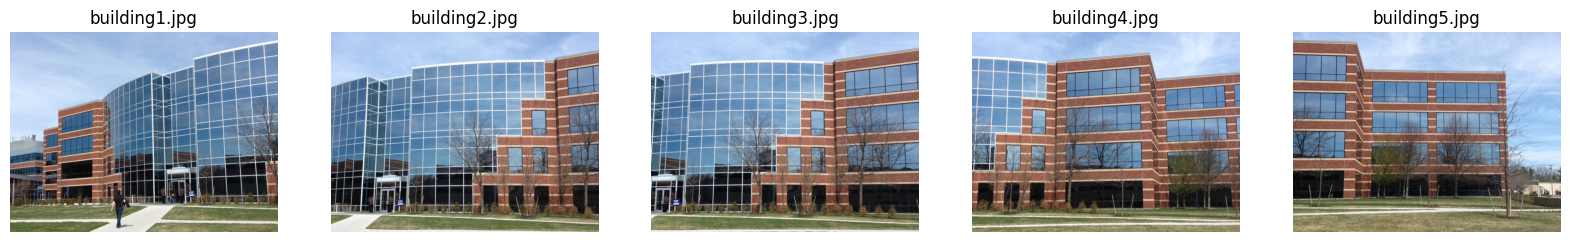

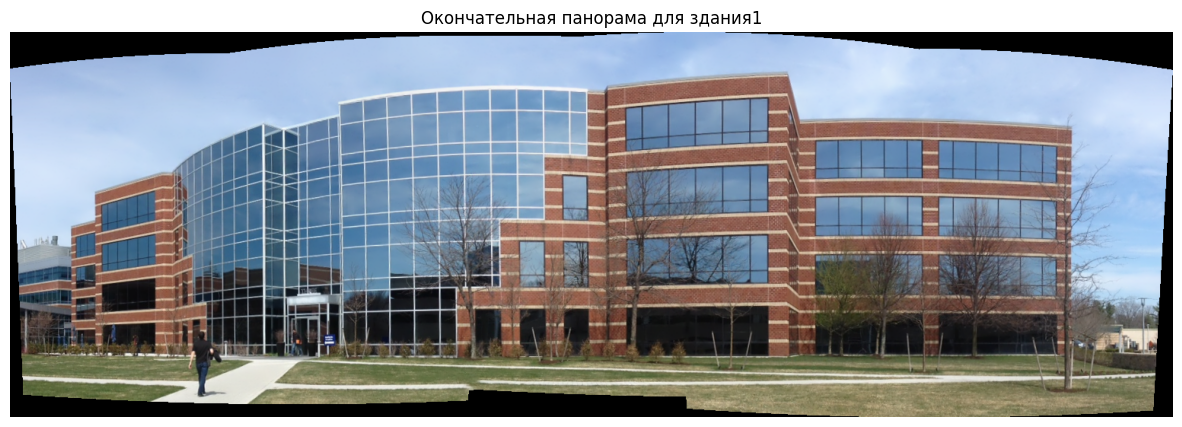

In [5]:
import os
import zipfile
from glob import glob
import cv2
import matplotlib.pyplot as plt

# Извлечь содержимое zip-архива
# Extraire le contenu de l'archive zip
#  Extract the contents of the zip archive
zip_file = "building1.zip"
dir_name = os.path.join("C:/Users/moumi/OneDrive/Bureau/lab_3-main", os.path.basename(zip_file).split('.')[0])

if not os.path.exists(dir_name):
    os.makedirs(dir_name)

with zipfile.ZipFile(zip_file, 'r') as zip_ref:
    zip_ref.extractall(dir_name)

# Чтение и отображение изображений из подкаталога
# Lire et afficher les images du sous-répertoire
# Read and display images from the subdirectory
def display_images_from_subdir(directory):
    image_paths = sorted(glob(os.path.join(directory, "*", "*")))
    images = [cv2.cvtColor(cv2.imread(image_path), cv2.COLOR_BGR2RGB) for image_path in image_paths]
    
    fig, axs = plt.subplots(1, len(images), figsize=(20, 5))
    for ax, img, path in zip(axs, images, image_paths):
        ax.imshow(img)
        ax.set_title(os.path.basename(path))
        ax.axis('off')

display_images_from_subdir(dir_name)

# Склеить изображения, чтобы создать панораму
# Assemblez les images pour créer un panorama
#  Stitch the images to create a panorama
def stitch_images_from_subdir(directory):
    image_paths = sorted(glob(os.path.join(directory, "*", "*")))
    images = [cv2.imread(image_path) for image_path in image_paths]

    stitcher = cv2.Stitcher_create()
    status, panorama = stitcher.stitch(images)
    return panorama if status == cv2.Stitcher_OK else None

panorama_building1 = stitch_images_from_subdir(dir_name)

# Отобразить полученную панораму
# Afficher le panorama résultant
# Display the resulting panorama
plt.figure(figsize=(15, 5))
plt.imshow(cv2.cvtColor(panorama_building1, cv2.COLOR_BGR2RGB))
plt.title("Окончательная панорама для здания1")
plt.axis('off')
plt.show()


## BUILDING 2


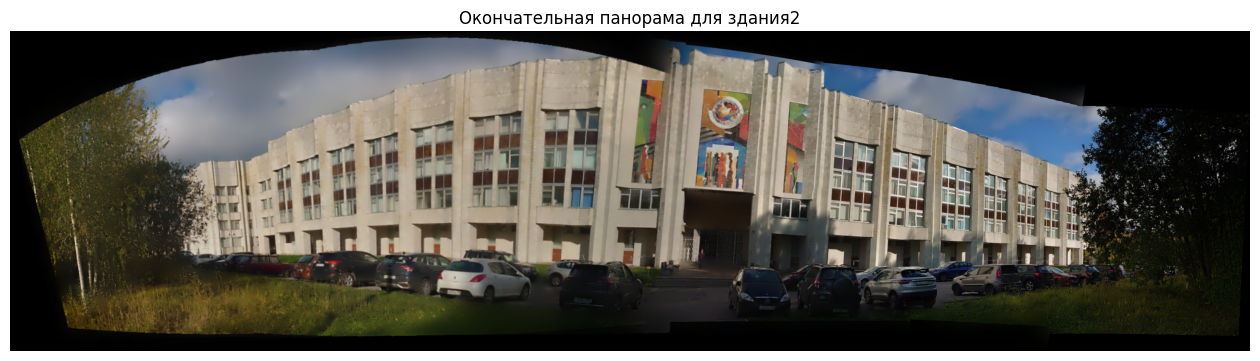

In [6]:
import os
import zipfile
from glob import glob
import cv2
import matplotlib.pyplot as plt

# Извлечь содержимое zip-архива
# Extraire le contenu de l'archive zip
# Extract the contents of the zip archive
zip_file = "building2.zip"
dir_name = os.path.join("C:/Users/moumi/OneDrive/Bureau/lab_3-main", os.path.basename(zip_file).split('.')[0])

if not os.path.exists(dir_name):
    os.makedirs(dir_name)

with zipfile.ZipFile(zip_file, 'r') as zip_ref:
    zip_ref.extractall(dir_name)
# Функция для сшивания двух изображений и возврата результата
# Fonction pour assembler deux images et renvoyer le résultat
# Function to stitch two images and return the result
def stitch_two_images(img1, img2):
    stitcher = cv2.Stitcher_create()
    status, panorama = stitcher.stitch([img1, img2])
    return panorama if status == cv2.Stitcher_OK else None

# Укажите порядок построения 2 изображений и сшивания их
# Spécifiez l'ordre de création de 2 images et assemblez-les
# Specify the order for building2 images and stitch them
order_building2 = ["dsc_2710.jpg", "dsc_2711.jpg", "dsc_2709.jpg", "dsc_2708.jpg", "dsc_2707.jpg"]
images = [cv2.imread(os.path.join(dir_name, "building2", img_name)) for img_name in order_building2]

# Сшиваем изображения вместе, используя цикл в указанном порядке
# Assemblez les images à l'aide d'une boucle pour l'ordre spécifié
# Stitch images together using a loop for the specified order
panorama = images[0]
for img in images[1:]:
    panorama = stitch_two_images(panorama, img)

# Отобразить полученную панораму
# Afficher le panorama résultant
# Display the resulting panorama
plt.figure(figsize=(16, 6))
plt.imshow(cv2.cvtColor(panorama, cv2.COLOR_BGR2RGB))
plt.title("Окончательная панорама для здания2")
plt.axis('off')
plt.show()


## BUILDING 3

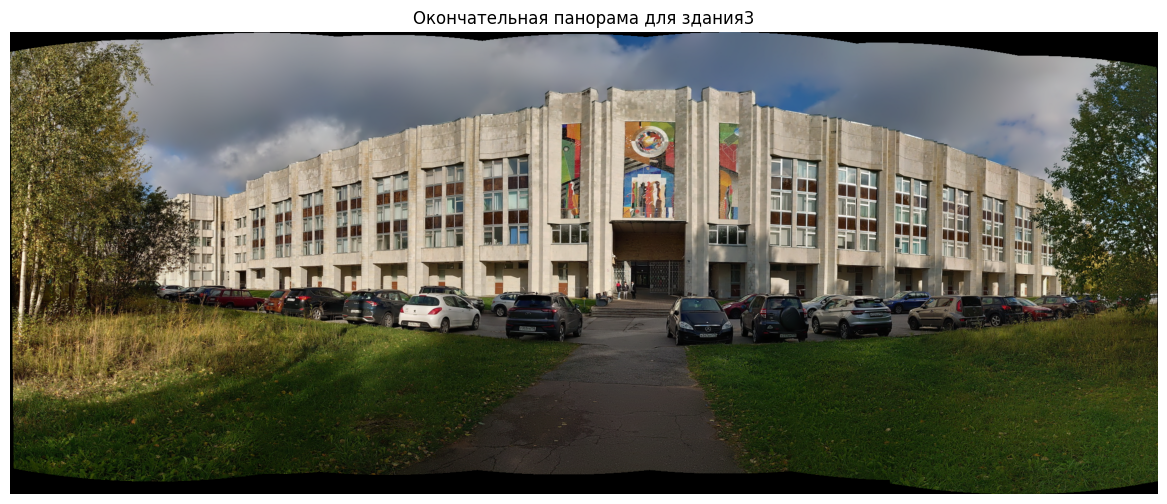

In [7]:
import os
import zipfile
from glob import glob
import cv2
import matplotlib.pyplot as plt

# Configurer les chemins et les répertoires
# Настройте пути и каталоги
# Set up the paths and directories
zip_file = "building3.zip"
dir_name = os.path.join("C:/Users/moumi/OneDrive/Bureau/lab_3-main", os.path.basename(zip_file).split('.')[0])


if not os.path.exists(dir_name):
    os.makedirs(dir_name)
    
# Извлеките содержимое zip-архива в каталог извлечения
# Extraire le contenu de l'archive zip dans le répertoire d'extraction
# Extract the contents of the zip archive to the extraction directory
with zipfile.ZipFile(zip_file, 'r') as zip_ref:
    zip_ref.extractall(dir_name)

# Загрузить изображения в обратном порядке
# -----------------------------------------
# Получить пути к изображениям в каталоге building3 и изменить их порядок на обратный

# Charger les images dans l'ordre inverse
# -----------------------------------------
# Obtenir les chemins des images dans le répertoire building3 et inverser leur ordre

# Load images in the reversed order
# -----------------------------------------
# Get the paths of the images in the building3 directory and reverse their order
image_paths = sorted(glob(os.path.join(dir_name, "building3", "*")), reverse=True)
images = [cv2.imread(image_path) for image_path in image_paths]

# Функция сшивания изображений вместе
# Fonction permettant d'assembler des images ensemble
# Function to stitch images together
def stitch_images(images):
    stitcher = cv2.Stitcher_create()
    status, panorama = stitcher.stitch(images)
    return panorama if status == cv2.Stitcher_OK else None

# Склеить изображения вместе
# Assemblez les images
# Stitch the images together
panorama = stitch_images(images)

# Отобразить полученную панораму
# Afficher le panorama résultant
# Display the resulting panorama
plt.figure(figsize=(16, 6))
plt.imshow(cv2.cvtColor(panorama, cv2.COLOR_BGR2RGB))
plt.title("Окончательная панорама для здания3")
plt.axis('off')
plt.show()
